In [2]:
# Задание-1:
# Матрицы в питоне реализуются в виде вложенных списков:
# Пример. Дано:
matrix = [[1, 0, 8],
          [3, 4, 1],
          [0, 4, 2]]
          
# Выполнить поворот (транспонирование) матрицы
# Пример. Результат:
# matrix_rotate = [[1, 3, 0],
#                  [0, 4, 4],
#                  [8, 1, 2]]

[list(i) for i in zip(*matrix)]

[[1, 3, 0], [0, 4, 4], [8, 1, 2]]

In [57]:
# Задание-2:
# Найдите наибольшее произведение пяти последовательных цифр в 1000-значном числе.
# Выведите произведение и индекс смещения первого числа последовательных 5-ти цифр.
# Пример 1000-значного числа:

import re

number = """
73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450"""

def mult_digits(number_str):
    number = int(number_str)
    res = 1
    while number > 0:
        res *= number % 10
        number //= 10
    return res

def get_max_mult(str_input):
    str_numbers = str_input.replace('\n', '')
    pattern = re.compile('(?=(\d{5}))')
    numbers = [(x[0], x[1], mult_digits(x[1])) for x in enumerate(pattern.findall(str_numbers))]
    max_v = max(numbers, key=lambda x: x[2])
    return max_v

print('Максимальное произведение: {2}\n\tполучено из числа: \'{1}\'\n\tна позиции: {0}'.format(*get_max_mult(number)))

Максимальное произведение: 40824
	получено из числа: '99879'
	на позиции: 364


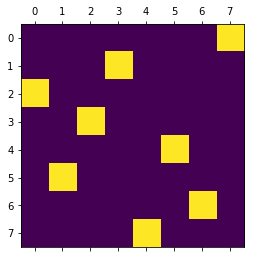

No
Ферзи не будут убивать


In [56]:
# Задание-3 (Ферзи):
# Известно, что на доске 8×8 можно расставить 8 ферзей так, чтобы они не били
# друг друга. Вам дана расстановка 8 ферзей на доске.
# Определите, есть ли среди них пара бьющих друг друга.
# Программа получает на вход восемь пар чисел,
# каждое число от 1 до 8 — координаты 8 ферзей.
# Если ферзи не бьют друг друга, выведите слово NO, иначе выведите YES.

import matplotlib.pyplot as plt
% matplotlib inline


def get_mtrx(queens_pos_list, desc_len=8):
    mtrx = [[0 for x in range(desc_len)] for y in range(desc_len)]
    for q_pos in queens_pos_list:
        mtrx[q_pos[0] - 1][q_pos[1] - 1] += 1
    return mtrx

def get_diagonals_desc(mtrx):
    mtrx_len = len(mtrx)
    diagonals = []

    for y in reversed(range(mtrx_len)):
        diag = []
        y_i = y
        for x in range(mtrx_len - y):
            diag.append(mtrx[y_i][x])
            y_i += 1
        diagonals.append(diag)

    for x in range(1, mtrx_len):
        diag = []
        x_i = x
        for y in range(mtrx_len - x):
            diag.append(mtrx[y][x_i])
            x_i += 1
        diagonals.append(diag)

    return diagonals


def get_diagonals_asc(mtrx):
    mtrx_len = len(mtrx)
    diagonals = []

    for y in range(mtrx_len):
        diag = []
        y_i = y
        for x in range(y + 1):
            diag.append(mtrx[y_i][x])
            y_i -= 1
        diagonals.append(diag)

    for x in range(1, mtrx_len):
        diag = []
        x_i = x
        for y in reversed(range(x, mtrx_len)):
            diag.append(mtrx[y][x_i])
            x_i += 1
        diagonals.append(diag)

    return diagonals


def are_queens_free_from_war(queens_pos_list, desc_len=8):
    mtrx = get_mtrx(queens_pos_list, desc_len)
    mtrx_len = len(mtrx)
    y_sum_arr = [sum(x) for x in mtrx]
    x_sum_arr = [sum([row[i] for row in mtrx]) for i in range(mtrx_len)]
    diag_desc = [sum(x) for x in get_diagonals_desc(mtrx)]
    diag_asc = [sum(x) for x in get_diagonals_asc(mtrx)]

    return max(y_sum_arr) <= 1 and max(x_sum_arr) <= 1 and max(diag_desc) <= 1 and max(diag_asc) <= 1


queens_pos_list = [(1, 8), (2, 4), (3, 1), (4, 3), (5, 6), (6, 2), (7, 7), (8, 5)]
board_size = 8

plt.matshow(get_mtrx(queens_pos_list, board_size))
plt.show()
res = are_queens_free_from_war(queens_pos_list, board_size)

print('No' if res else 'Yes')
print('Ферзи не будут убивать' if res else 'Ферзи прольют кровь')
